<a href="https://colab.research.google.com/github/trihadianto15/submissions_akhir/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Klasifikasi Gambar: Animal Faces
- **Nama:** Tri Hadianto
- **Email:** MC459D5Y0418@student.devacademy.id
- **ID Dicoding:** MC459D5Y0418

## Import Semua Packages/Library yang Digunakan

In [52]:
import os
import zipfile
import tensorflow as tf
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import Sequential, models, layers
import pathlib

## Data Preparation

### Data Loading

In [13]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"trihadianto","key":"09a5c9da772f2c2f776d7093a7b90b1b"}'}

In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
!kaggle datasets download -d andrewmvd/animal-faces

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/animal-faces
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)


In [16]:
!unzip -q animal-faces.zip

### Data Preprocessing

#### Split Dataset

In [17]:
input_folder = '/content/afhq/train'
output_folder = '/content/afhq_split'
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.8, .1, .1))


Copying files: 14630 files [00:07, 1928.07 files/s]


In [18]:
base_dir = '/content/afhq_split'

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

classes = ['cat', 'dog', 'wild']

## Modelling

In [19]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    )

val_datagen = ImageDataGenerator(
                    rescale=1./255)

test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [20]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                              batch_size=32,
                                              target_size=(150,150),
                                              color_mode="rgb",
                                              class_mode='categorical',
                                              shuffle=True)

validation_generator = val_datagen.flow_from_directory(val_dir,
                                                   batch_size=32,
                                                   target_size=(150,150),
                                                   color_mode="rgb",
                                                   class_mode='categorical',
                                                   shuffle=False)


test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(150,150),
                                                  color_mode="rgb",
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 11703 images belonging to 3 classes.
Found 1461 images belonging to 3 classes.
Found 1466 images belonging to 3 classes.


In [32]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 3))),
model.add(MaxPooling2D(2, 2)),

model.add(Conv2D(64, (3, 3), padding='same', activation='relu')),
model.add(MaxPooling2D(2, 2)),

model.add(Conv2D(128, (3, 3), padding='same', activation='relu')),
model.add(MaxPooling2D(2, 2)),

model.add(Flatten()),

model.add(Dense(128, activation = 'relu')),
model.add(Dropout(0.5)),
model.add(Dense(64, activation = 'relu')),
model.add(Dropout(0.3)),

model.add(Dense(3, activation = 'softmax'))


In [33]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,410,243 (20.64 MB)

 Trainable params: 5,410,243 (20.64 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# compile model dengan 'adam' optimizer loss function 'categorical'
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

## Evaluasi dan Visualisasi

In [41]:
# Fitting / training model
history = model.fit(train_generator,
                        epochs=30,
                        steps_per_epoch=25,
                        batch_size=32,
                        validation_data=validation_generator,
                        )

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.8767 - loss: 0.3430 - val_accuracy: 0.8953 - val_loss: 0.3138
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - accuracy: 0.8676 - loss: 0.3409 - val_accuracy: 0.9247 - val_loss: 0.2096
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.8787 - loss: 0.3397 - val_accuracy: 0.9117 - val_loss: 0.2662
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.9035 - loss: 0.2697 - val_accuracy: 0.9206 - val_loss: 0.2206
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.9003 - loss: 0.2758 - val_accuracy: 0.9247 - val_loss: 0.2144
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9191 - loss: 0.2476 - val_accuracy: 0.9179 - val_loss: 0.2310
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.9134 - loss: 0.2717 - val_accuracy: 0.9295 - val_loss: 0.2051
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 0.8976 - loss: 0.2696 - val_accuracy: 0.9254 - val_loss:

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


25/25 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.9175 - loss: 0.2013 - val_accuracy: 0.9480 - val_loss: 0.1479
Epoch 16/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 66s 3s/step - accuracy: 0.9287 - loss: 0.1998 - val_accuracy: 0.9548 - val_loss: 0.1294
Epoch 17/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9316 - loss: 0.1865 - val_accuracy: 0.9370 - val_loss: 0.1843
Epoch 18/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.9088 - loss: 0.2065 - val_accuracy: 0.9220 - val_loss: 0.2163
Epoch 19/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.9238 - loss: 0.2031 - val_accuracy: 0.9610 - val_loss: 0.1284
Epoch 20/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 85s 3s/step - accuracy: 0.9553 - loss: 0.1299 - val_accuracy: 0.9569 - val_loss: 0.1392
Epoch 21/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.9568 - loss: 0.1217 - val_accuracy: 0.9644 - val_loss: 0.1146
Epoch 22/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9517 - loss: 0.1462 - val_accuracy: 0.9541 - val_loss: 0.1

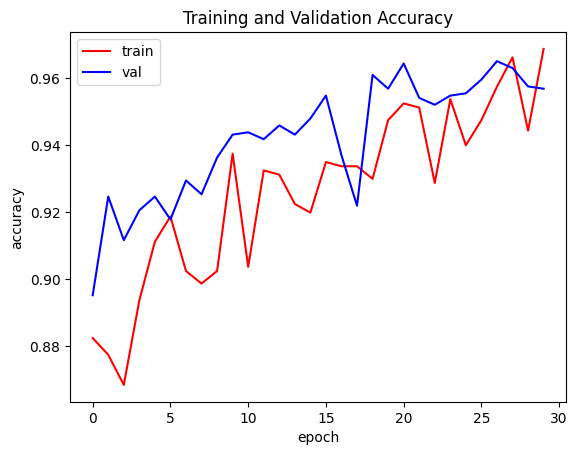

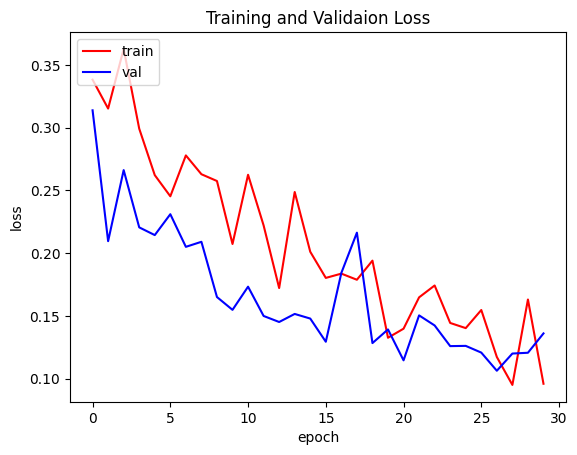

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

Saving kucing.jpg to kucing.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
kucing.jpg
cat


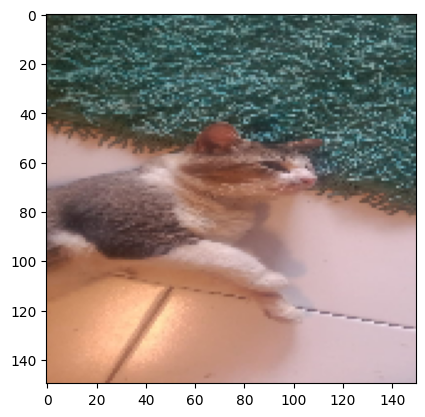

In [46]:
uploaded = files.upload()

for fn in uploaded.keys():
    # Predicting images
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])


    predict = model.predict(images, batch_size=10)[0]

    index = np.where(predict == 1.)[0][0]
    result = classes[index]

    print(fn)
    print(result)

## Konversi Model

In [64]:
model.export('saved_model/my_model')


Saved artifact at 'saved_model/my_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_79')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  135691375801168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135691375801744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135691375802512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135691375803088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135691375802896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135691375803856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135691375803664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135691375804048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135691375802320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135691373528656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1356913

In [61]:
converter = tf.lite.TFLiteConverter.from_saved_model("saved_model/my_model")
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
    f.write(tflite_model)


## Inference (Optional)